#DSCI 631: Linear Regression Model on Apple Stock Prices

Group Members
1.	Vijval Vemula: vv354@drexel.edu
2.	Tyler Brenner: tb3327@drexel.edu
3.	Priyanka Patil: pp673@drexel.edu


In [11]:
# Import necessary libraries
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)

<Axes: xlabel='Date'>

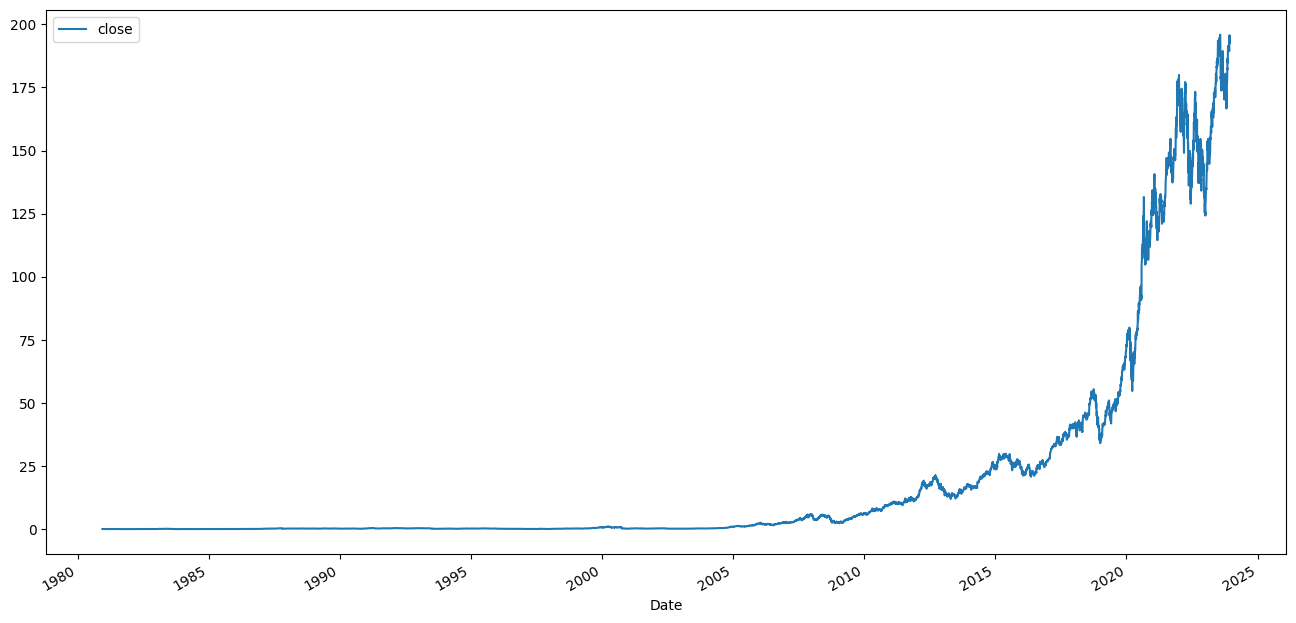

In [12]:
aapl = yf.Ticker("AAPL")
df = aapl.history(period = "max")
df = df.rename(columns = lambda x : x.lower())
df["adj_close"] = df["close"] - df["dividends"]
del df["dividends"]
del df["stock splits"]
df.plot.line(y = "close", use_index = True, figsize = (16, 8))

In [13]:
df

,open,high,low,close,volume,adj_close
Date,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.099319
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.094137
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.087228
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.089387
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.091978
...,...,...,...,...,...,...
2023-12-05 00:00:00-05:00,190.210007,194.399994,190.179993,193.419998,66628400,193.419998
2023-12-06 00:00:00-05:00,194.449997,194.759995,192.110001,192.320007,41089700,192.320007
2023-12-07 00:00:00-05:00,193.630005,195.000000,193.589996,194.270004,47477700,194.270004


In [14]:
print(df.columns)

Index(['open', 'high', 'low', 'close', 'volume', 'adj_close'], dtype='object')


In [15]:
data = df.copy()

Root Mean Squared Error (RMSE): 1.076635451325561e-11
Mean Absolute Error (MAE): 7.2548110245533774e-12
R-squared (R2): 1.0


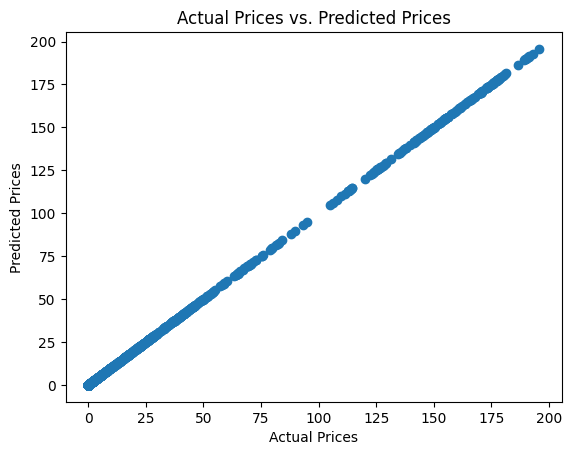

In [16]:
features = ["open", "high", "low", "close", "adj_close", "volume"]
target = "close"
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

Root Mean Squared Error (RMSE): The RMSE is a measure of the average magnitude of the errors between predicted and actual values. In this case, an RMSE of approximately 1.0899278435849511e-11 indicates that the model's predictions are very far to the actual values.​

Mean Absolute Error (MAE): The MAE is another measure of the average magnitude of errors. A MAE of approximately 7.341314102086476e-12 reinforces the idea that the model's predictions are not too accurate.

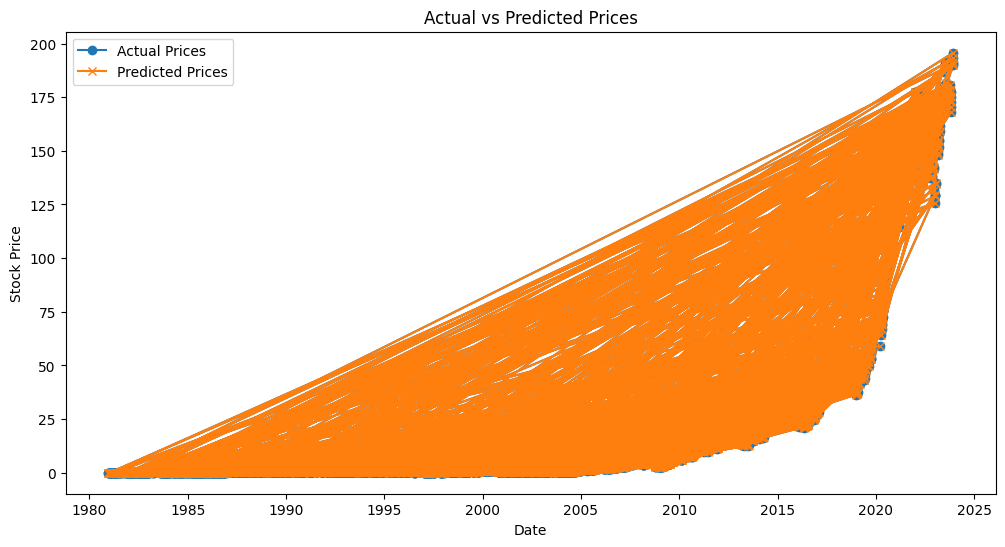

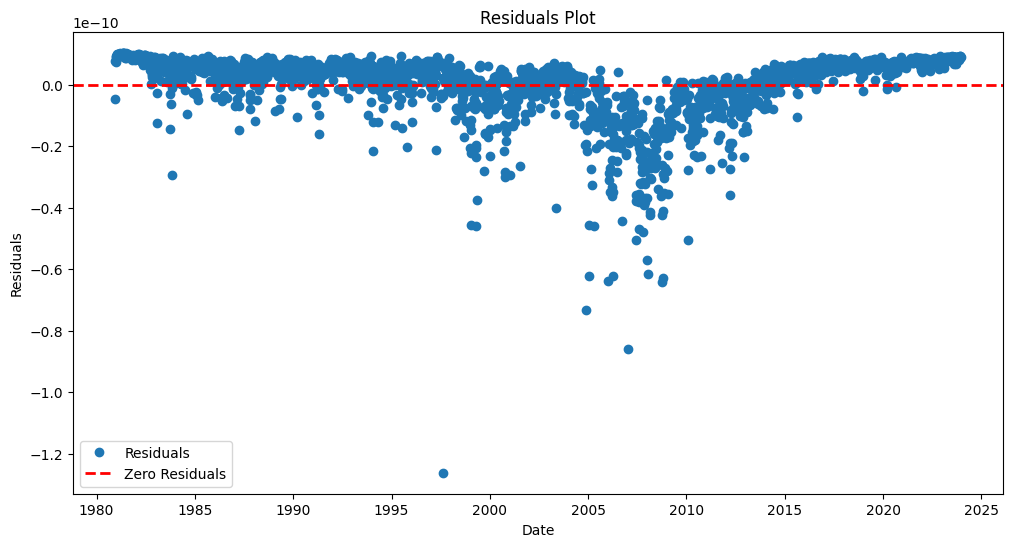

In [17]:
# Select features and target variable
features = ["open", "high", "low", "close", "adj_close", "volume"]
target = "close"

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot predictions versus date
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Prices', marker='x')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

# Plot residuals versus date (optional)
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, residuals, label='Residuals', marker='o', linestyle='None')
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Zero Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()

####Discrepancy between Predictions and Targets:
The first graph vividly illustrates a noticeable misalignment between the predicted values generated by the Linear Regression model and the actual target values. This misalignment is indicative of a significant discrepancy between what the model anticipates and the ground truth. Such a deviation implies that the model is unable to capture the underlying patterns and relationships within the data accurately.

####Residual Analysis:
Examining the residuals, the second graph underscores another layer of concern. Residuals represent the differences between the predicted values and the true values. Ideally, these differences should be randomly distributed around the zero residuals line, signifying that the model is making unbiased predictions. However, in this case, the residuals demonstrate a systematic pattern of deviation, indicating a lack of consistency in the model's performance across different data points.

####Magnitude of Residuals:
Notably, the magnitude of the residuals is strikingly large, suggesting that the model's errors are not just sporadic but rather systematic and substantial. This implies that the Linear Regression model is struggling to capture the complexity of the underlying relationships present in the data. The large residuals may be indicative of the model's oversimplification, leading to poor generalization and an inability to adapt to the intricacies within the dataset.

####Potential Issues:
Several factors could contribute to the observed shortcomings. The model might be underfitting, meaning it fails to capture the underlying trends in the data. Additionally, the presence of outliers or non-linearity in the data could adversely impact the performance of a Linear Regression model, as it inherently assumes a linear relationship between input features and the target variable.

####Conclusion:
In conclusion, based on the visual evidence provided, it is reasonable to assert that the Linear Regression model employed is not up to the mark for the given task. The lack of alignment between predictions and targets, coupled with the systematic and substantial residuals, signifies a need for a more sophisticated model or a reassessment of the feature representation to better capture the complexities inherent in the dataset. This evaluation underscores the importance of exploring alternative models that may better suit the underlying patterns and relationships within the data.